In [1]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('prducts.csv', index_col=0)

df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,NaN,\nNorth America\n,"114,153,248","+6,265","1,522,430",+55,"107,866,759","+10,999","4,764,059","9,410",...,NaN,NaN,NaN,North America,\n,NaN,NaN,NaN,NaN,NaN
1,NaN,\nAsia\n,"183,436,401","+310,063","1,466,499",+595,"175,027,860","+382,016","6,942,042","12,791",...,NaN,NaN,NaN,Asia,\n,NaN,NaN,NaN,NaN,NaN
2,NaN,\nEurope\n,"221,607,231","+125,128","1,902,165",+463,"215,212,855","+153,063","4,492,211","9,177",...,NaN,NaN,NaN,Europe,\n,NaN,NaN,NaN,NaN,NaN
3,NaN,\nSouth America\n,"63,583,928","+6,580","1,325,158",+8,"61,625,601","+22,308","633,169","10,529",...,NaN,NaN,NaN,South America,\n,NaN,NaN,NaN,NaN,NaN
4,NaN,\nOceania\n,"12,142,436","+15,580","19,429",+86,"11,921,838","+12,823","201,169",139,...,NaN,NaN,NaN,Australia/Oceania,\n,NaN,NaN,NaN,NaN,NaN


In [3]:
df=df.drop(df.index[0:7])
df=df.drop(df.index[238:245])
df=df.drop(['#'],axis='columns')
df=df.drop(['Continent','1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M pop'], axis='columns')
df.reset_index(inplace=True, drop=True)
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,World,"607,528,822","+463,810","6,493,061","+1,208","583,595,093","+581,356","17,440,668","43,071","77,940",833.0,NaN,NaN,NaN
1,USA,"96,149,016",NaN,"1,069,748",NaN,"91,873,169",NaN,"3,206,099","4,029",NaN,NaN,"1,100,355,942",NaN,
2,India,"44,429,258",NaN,"527,874",NaN,"43,835,852",NaN,"65,532",698,"31,526",375,"885,881,136","628,608","1,409,273,386"
3,France,"34,529,201","+19,240","154,093",+54,"34,015,242","+24,240","359,866",869,"526,480","2,350","271,490,188","4,139,517","65,584,999"
4,Brazil,"34,414,011",NaN,"683,914",NaN,"33,457,359",NaN,"272,738","8,318","159,458","3,169","63,776,166","295,508","215,818,679"


In [4]:
df.columns

Index(['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop\n',
       'Population'],
      dtype='object')

In [5]:
df.rename(columns={'Serious,Critical':'Serious','Country,Other':'Country'}, inplace=True)
df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,World,"607,528,822","+463,810","6,493,061","+1,208","583,595,093","+581,356","17,440,668","43,071","77,940",833.0,NaN,NaN,NaN
1,USA,"96,149,016",NaN,"1,069,748",NaN,"91,873,169",NaN,"3,206,099","4,029",NaN,NaN,"1,100,355,942",NaN,
2,India,"44,429,258",NaN,"527,874",NaN,"43,835,852",NaN,"65,532",698,"31,526",375,"885,881,136","628,608","1,409,273,386"
3,France,"34,529,201","+19,240","154,093",+54,"34,015,242","+24,240","359,866",869,"526,480","2,350","271,490,188","4,139,517","65,584,999"
4,Brazil,"34,414,011",NaN,"683,914",NaN,"33,457,359",NaN,"272,738","8,318","159,458","3,169","63,776,166","295,508","215,818,679"


In [6]:
df.shape

(238, 14)

In [7]:
df.describe()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
count,238,238,73,238,46,219,74,220,159,228,223,214,213,230
unique,232,238,68,223,31,219,70,211,89,228,202,214,213,228
top,Total:,"4,782,624",+568,,+1,"471,641",+8,0,1,"149,176",13,"5,749,152","1,010,039",
freq,7,1,2,5,8,1,2,6,15,1,3,1,1,3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           238 non-null    object
 1   TotalCases        238 non-null    object
 2   NewCases          73 non-null     object
 3   TotalDeaths       238 non-null    object
 4   NewDeaths         46 non-null     object
 5   TotalRecovered    219 non-null    object
 6   NewRecovered      74 non-null     object
 7   ActiveCases       220 non-null    object
 8   Serious           159 non-null    object
 9   Tot Cases/1M pop  228 non-null    object
 10  Deaths/1M pop     223 non-null    object
 11  TotalTests        214 non-null    object
 12  Tests/
1M pop
    213 non-null    object
 13  Population        230 non-null    object
dtypes: object(14)
memory usage: 26.2+ KB


In [9]:
df['NewCases']=df['NewCases'].str.replace('+','')
df['NewDeaths']=df['NewDeaths'].str.replace('+','')
df['NewRecovered']=df['NewRecovered'].str.replace('+','')
df.head()

<ipython-input-9-fe45a9d0e5ee>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['NewCases']=df['NewCases'].str.replace('+','')
<ipython-input-9-fe45a9d0e5ee>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['NewDeaths']=df['NewDeaths'].str.replace('+','')
<ipython-input-9-fe45a9d0e5ee>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['NewRecovered']=df['NewRecovered'].str.replace('+','')


,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,World,"607,528,822","463,810","6,493,061","1,208","583,595,093","581,356","17,440,668","43,071","77,940",833.0,NaN,NaN,NaN
1,USA,"96,149,016",NaN,"1,069,748",NaN,"91,873,169",NaN,"3,206,099","4,029",NaN,NaN,"1,100,355,942",NaN,
2,India,"44,429,258",NaN,"527,874",NaN,"43,835,852",NaN,"65,532",698,"31,526",375,"885,881,136","628,608","1,409,273,386"
3,France,"34,529,201","19,240","154,093",54,"34,015,242","24,240","359,866",869,"526,480","2,350","271,490,188","4,139,517","65,584,999"
4,Brazil,"34,414,011",NaN,"683,914",NaN,"33,457,359",NaN,"272,738","8,318","159,458","3,169","63,776,166","295,508","215,818,679"


In [10]:
df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,World,"607,528,822","463,810","6,493,061","1,208","583,595,093","581,356","17,440,668","43,071","77,940",833.0,NaN,NaN,NaN
1,USA,"96,149,016",NaN,"1,069,748",NaN,"91,873,169",NaN,"3,206,099","4,029",NaN,NaN,"1,100,355,942",NaN,
2,India,"44,429,258",NaN,"527,874",NaN,"43,835,852",NaN,"65,532",698,"31,526",375,"885,881,136","628,608","1,409,273,386"
3,France,"34,529,201","19,240","154,093",54,"34,015,242","24,240","359,866",869,"526,480","2,350","271,490,188","4,139,517","65,584,999"
4,Brazil,"34,414,011",NaN,"683,914",NaN,"33,457,359",NaN,"272,738","8,318","159,458","3,169","63,776,166","295,508","215,818,679"


In [11]:
for col in df.columns:
    df[col] =df[col].str.replace(',','')
df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,World,607528822,463810,6493061,1208,583595093,581356,17440668,43071,77940,833.0,NaN,NaN,NaN
1,USA,96149016,NaN,1069748,NaN,91873169,NaN,3206099,4029,NaN,NaN,1100355942,NaN,
2,India,44429258,NaN,527874,NaN,43835852,NaN,65532,698,31526,375,885881136,628608,1409273386
3,France,34529201,19240,154093,54,34015242,24240,359866,869,526480,2350,271490188,4139517,65584999
4,Brazil,34414011,NaN,683914,NaN,33457359,NaN,272738,8318,159458,3169,63776166,295508,215818679


In [12]:
for col in df.columns[1:]:
    df[col] =pd.to_numeric(df[col], errors='coerce')
df.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,World,607528822,463810.0,6493061.0,1208.0,583595093.0,581356.0,17440668.0,43071.0,77940.0,833.0,NaN,NaN,NaN
1,USA,96149016,NaN,1069748.0,NaN,91873169.0,NaN,3206099.0,4029.0,NaN,NaN,1.100356e+09,NaN,NaN
2,India,44429258,NaN,527874.0,NaN,43835852.0,NaN,65532.0,698.0,31526.0,375.0,8.858811e+08,628608.0,1.409273e+09
3,France,34529201,19240.0,154093.0,54.0,34015242.0,24240.0,359866.0,869.0,526480.0,2350.0,2.714902e+08,4139517.0,6.558500e+07
4,Brazil,34414011,NaN,683914.0,NaN,33457359.0,NaN,272738.0,8318.0,159458.0,3169.0,6.377617e+07,295508.0,2.158187e+08


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           238 non-null    object 
 1   TotalCases        238 non-null    int64  
 2   NewCases          73 non-null     float64
 3   TotalDeaths       233 non-null    float64
 4   NewDeaths         46 non-null     float64
 5   TotalRecovered    219 non-null    float64
 6   NewRecovered      74 non-null     float64
 7   ActiveCases       220 non-null    float64
 8   Serious           159 non-null    float64
 9   Tot Cases/1M pop  228 non-null    float64
 10  Deaths/1M pop     223 non-null    float64
 11  TotalTests        214 non-null    float64
 12  Tests/
1M pop
    213 non-null    float64
 13  Population        227 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 26.2+ KB


In [14]:
d=df.drop(['Country'], axis='columns')
d.head()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,Serious,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population
0,607528822,463810.0,6493061.0,1208.0,583595093.0,581356.0,17440668.0,43071.0,77940.0,833.0,NaN,NaN,NaN
1,96149016,NaN,1069748.0,NaN,91873169.0,NaN,3206099.0,4029.0,NaN,NaN,1.100356e+09,NaN,NaN
2,44429258,NaN,527874.0,NaN,43835852.0,NaN,65532.0,698.0,31526.0,375.0,8.858811e+08,628608.0,1.409273e+09
3,34529201,19240.0,154093.0,54.0,34015242.0,24240.0,359866.0,869.0,526480.0,2350.0,2.714902e+08,4139517.0,6.558500e+07
4,34414011,NaN,683914.0,NaN,33457359.0,NaN,272738.0,8318.0,159458.0,3169.0,6.377617e+07,295508.0,2.158187e+08


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


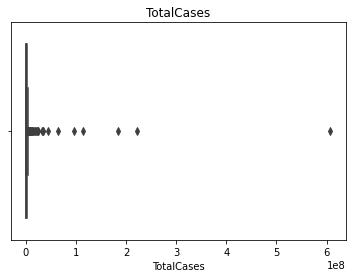

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


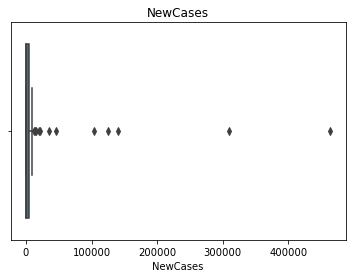

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


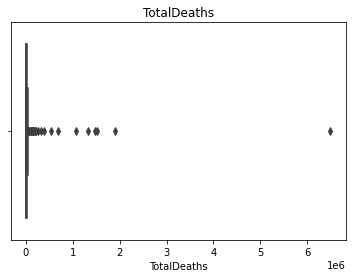

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


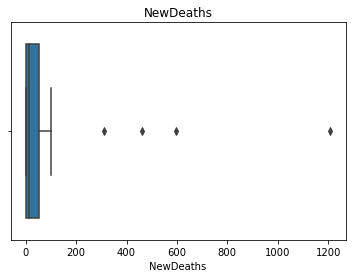

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


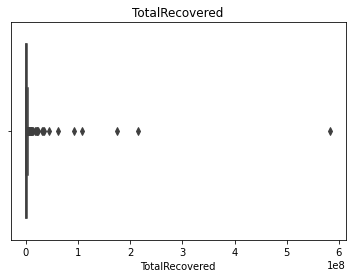

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


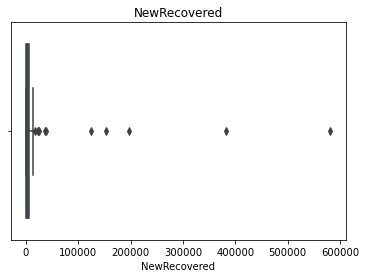

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


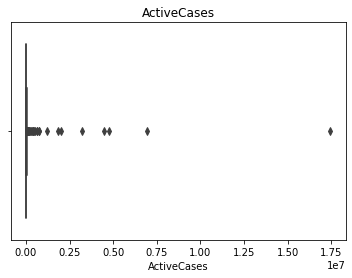

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


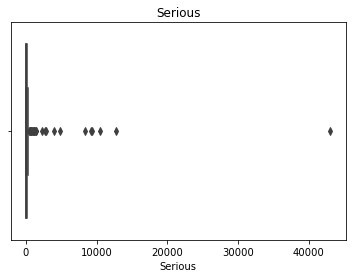

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


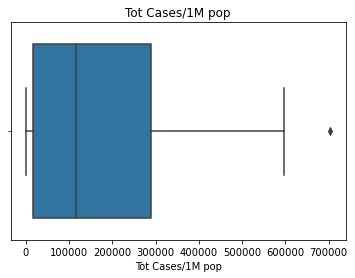

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


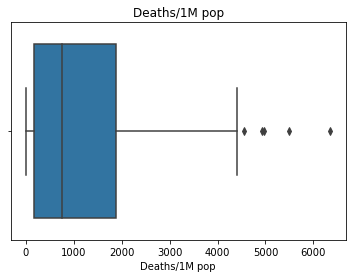

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


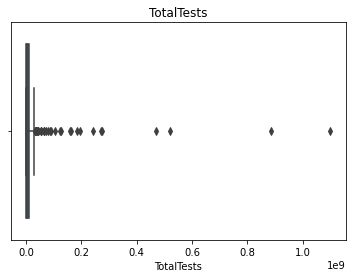

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


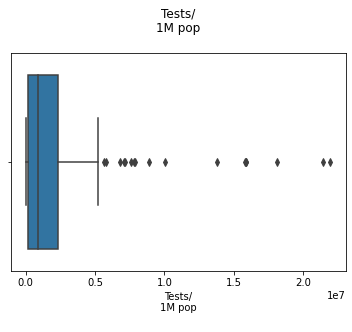

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


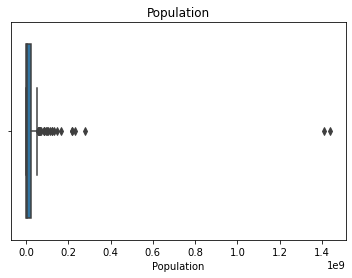

In [15]:
for i in d:
    sns.boxplot(d[i])
    plt.title(i)
    plt.show()
    

In [16]:
df.isnull().sum()

Country               0
TotalCases            0
NewCases            165
TotalDeaths           5
NewDeaths           192
TotalRecovered       19
NewRecovered        164
ActiveCases          18
Serious              79
Tot Cases/1M pop     10
Deaths/1M pop        15
TotalTests           24
Tests/\n1M pop\n     25
Population           11
dtype: int64

In [17]:
df=df.fillna(0)
df.isnull().sum()

Country             0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious             0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/\n1M pop\n    0
Population          0
dtype: int64

In [18]:
pd.pivot_table(df, index='Country', values=['TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases','Serious','Deaths/1M pop','TotalTests','Tests/\n1M pop\n','Population'])

,ActiveCases,Deaths/1M pop,NewCases,NewDeaths,NewRecovered,Population,Serious,Tests/\n1M pop\n,TotalCases,TotalDeaths,TotalRecovered,TotalTests
Country,,,,,,,,,,,,
Afghanistan,13708.0,191.0,0.0,0.0,0.0,40819968.0,1124.0,26123.0,193004.0,7777.0,171519.0,1066354.0
Albania,4437.0,1248.0,335.0,1.0,363.0,2871022.0,0.0,676077.0,329352.0,3582.0,321333.0,1941032.0
Algeria,81487.0,151.0,0.0,0.0,0.0,45559479.0,6.0,5067.0,270272.0,6878.0,181907.0,230861.0
Andorra,82.0,1986.0,0.0,0.0,0.0,77532.0,14.0,3222386.0,46027.0,154.0,45791.0,249838.0
Angola,282.0,55.0,0.0,0.0,0.0,35072375.0,0.0,42763.0,102636.0,1917.0,100437.0,1499795.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0.0,2.0,0.0,0.0,0.0,629027.0,0.0,0.0,10.0,1.0,9.0,0.0
World,17440668.0,833.0,463810.0,1208.0,581356.0,0.0,43071.0,0.0,607528822.0,6493061.0,583595093.0,0.0
Yemen,652.0,69.0,0.0,0.0,0.0,31243301.0,23.0,10549.0,11926.0,2155.0,9119.0,329592.0


<AxesSubplot:>

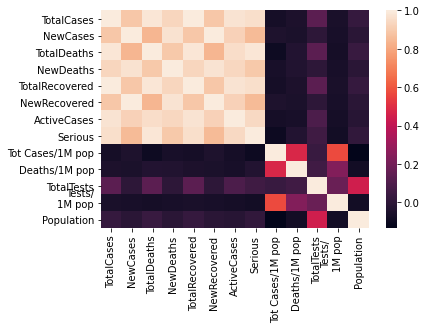

In [19]:
cor=df.select_dtypes(py.number).corr()
sns.heatmap(cor)

In [20]:
z=pd.pivot_table(df, index='Country', values=['TotalCases']).sort_values(by='TotalCases', ascending=False).round()
z.head()

,TotalCases
Country,
World,607528822.0
USA,96149016.0
Total:,86789832.0
India,44429258.0
France,34529201.0


In [21]:
z=pd.pivot_table(df, index='Country', values=['NewCases']).sort_values(by='NewCases', ascending=False).round()
z.head()

,NewCases
Country,
World,463810.0
Japan,139582.0
S. Korea,103919.0
Total:,66259.0
Russia,46321.0


In [22]:
z=pd.pivot_table(df, index='Country', values=['TotalDeaths']).sort_values(by='TotalDeaths', ascending=False).round()
z.head()

,TotalDeaths
Country,
World,6493061.0
USA,1069748.0
Total:,927580.0
Brazil,683914.0
India,527874.0


In [23]:
z=pd.pivot_table(df, index='Country', values=['ActiveCases']).sort_values(by='ActiveCases', ascending=False).round()
z.head()

,ActiveCases
Country,
World,17440668.0
USA,3206099.0
Total:,2491524.0
S. Korea,2009968.0
Japan,1856477.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalTests', ylabel='TotalCases'>

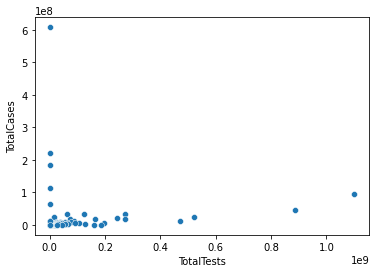

In [24]:
sns.scatterplot(df.TotalTests,df.TotalCases)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NewCases', ylabel='TotalTests'>

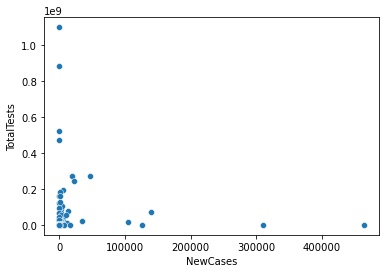

In [25]:
sns.scatterplot(df.NewCases,df.TotalTests)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalTests', ylabel='NewCases'>

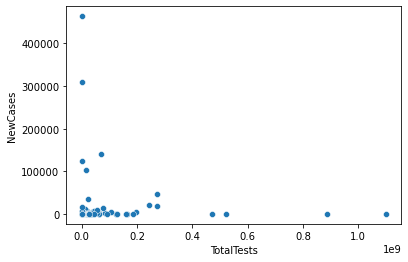

In [26]:
sns.scatterplot(df.TotalTests,df.NewCases)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalRecovered', ylabel='TotalCases'>

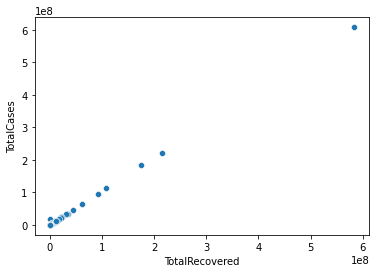

In [27]:
sns.scatterplot(df.TotalRecovered,df.TotalCases)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalDeaths', ylabel='TotalCases'>

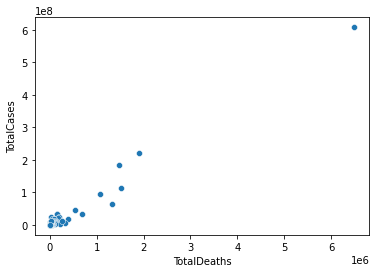

In [28]:
sns.scatterplot(df.TotalDeaths,df.TotalCases)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ActiveCases', ylabel='TotalCases'>

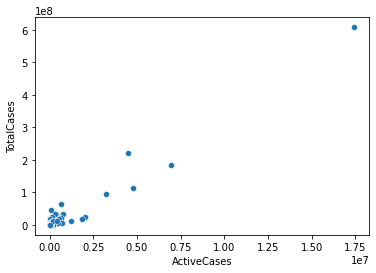

In [29]:
sns.scatterplot(df.ActiveCases ,df.TotalCases)